<a href="https://colab.research.google.com/github/Gerie-2017/Hands_On_Practices/blob/main/association_rule_mining_gerie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing dependencies and setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

# Step 2: Importing the Dataset and View some insights, Preprocess

In [ ]:
dataset = pd.read_csv("~/Market_Basket_Optimisation.csv", header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the shape of the dataset
dataset.shape

(7501, 20)

In [ ]:
# Checking some information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().values.sum()

120657

### preprocessing

In [ ]:
transaction_encode = TransactionEncoder()
dataset_array = dataset.to_numpy(na_value="NA")
encoded_dataset = transaction_encode.fit_transform(dataset_array)
encoded_dataset = pd.DataFrame(encoded_dataset, columns=transaction_encode.columns_)
encoded_dataset = encoded_dataset.drop(columns=["NA"])

encoded_dataset.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
encoded_dataset.isnull().values.sum()

0

# Step 3: Restructuring the Dataset for association analysis

In [ ]:
dataset = encoded_dataset.reset_index()

In [ ]:
dataset.columns

Index(['index', ' asparagus', 'almonds', 'antioxydant juice', 'asparagus',
       'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=121)

In [ ]:
dataset = dataset.pivot_table(index='index', columns=None, aggfunc='count')

In [ ]:
dataset.tail()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
index,,,,,,,,,,,,,,,,,,,,,
7496,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7497,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7498,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7499,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7500,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
dataset.shape

(7501, 120)

# Step 4: Visualizing Support of each item.

<Axes: >

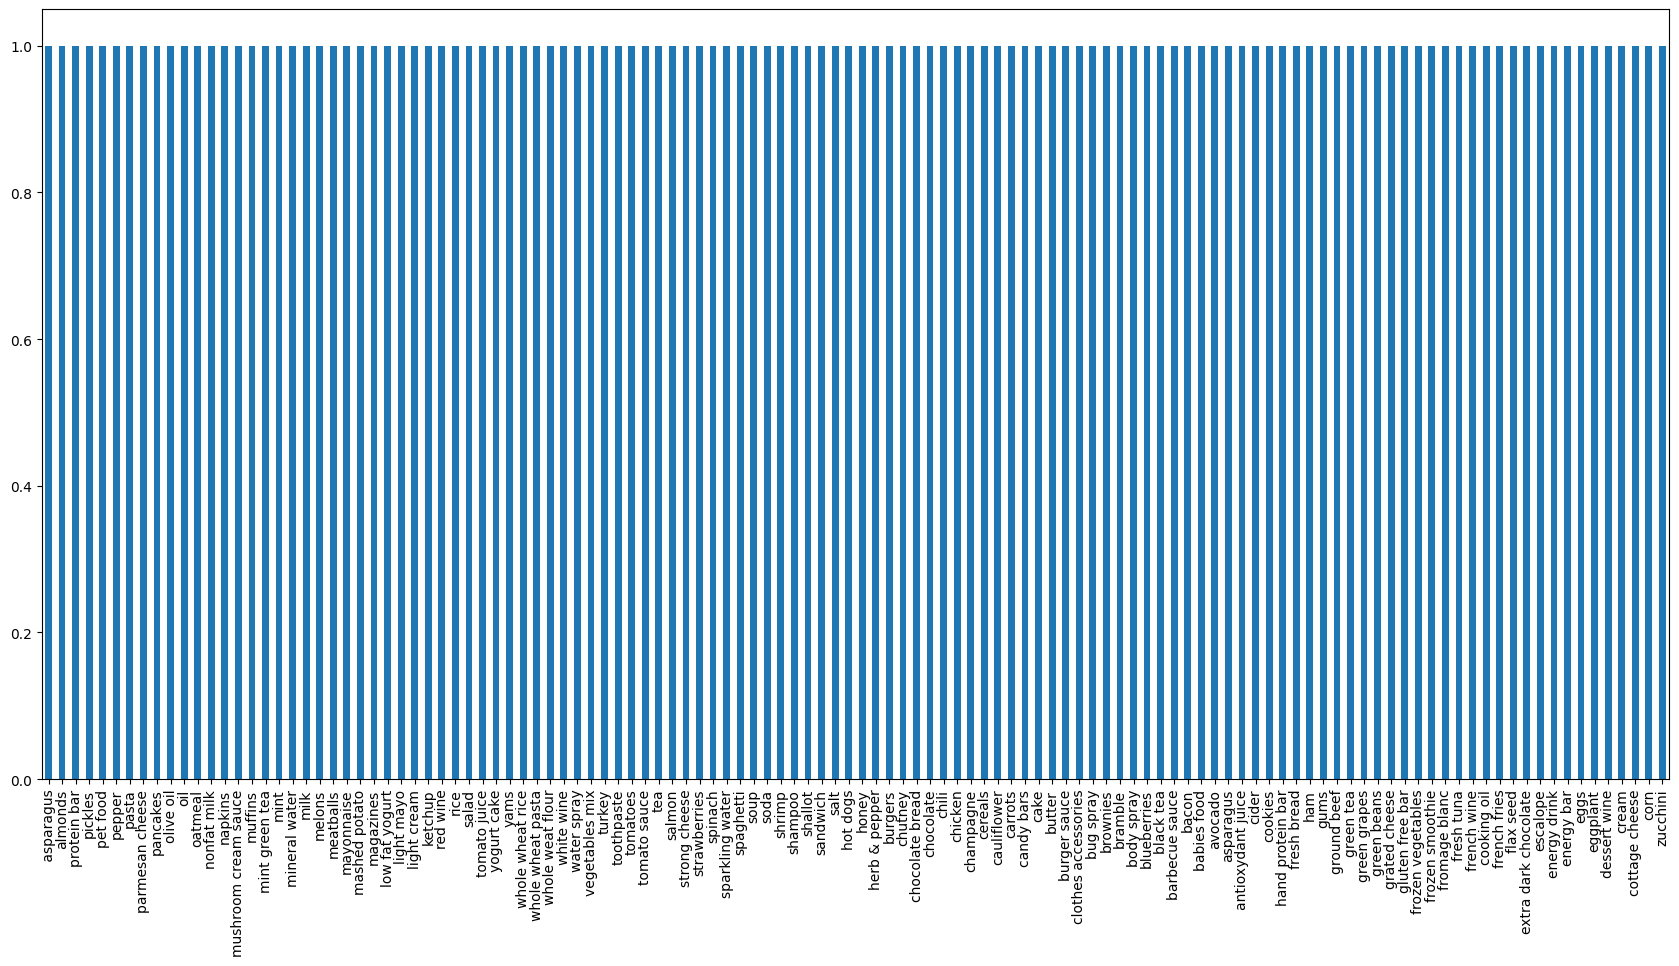

In [ ]:
plt.figure(figsize=(21, 10))
dataset.mean().sort_values(ascending=False).plot(kind='bar')

# Step 5: Extract Frequent ItemSets

In [ ]:
frequent_itemsets = apriori(dataset, min_support=0.001, max_len=3, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,1.0,( asparagus)
1,1.0,(almonds)
2,1.0,(antioxydant juice)
3,1.0,(asparagus)
4,1.0,(avocado)
...,...,...
288095,1.0,"(zucchini, whole wheat pasta, yogurt cake)"
288096,1.0,"(yams, yogurt cake, whole wheat rice)"
288097,1.0,"(zucchini, yams, whole wheat rice)"
288098,1.0,"(zucchini, yogurt cake, whole wheat rice)"


In [ ]:
frequent_itemsets.describe()

,support
count,288100.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
frequent_itemsets['support'].max()

1.0

# Step 6: Identifying Meaningful Rules

In [ ]:
itemset_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [ ]:
itemset_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( asparagus),(almonds),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(almonds),( asparagus),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(antioxydant juice),( asparagus),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,( asparagus),(antioxydant juice),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(asparagus),( asparagus),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
1699315,"(zucchini, yams)",(yogurt cake),1.0,1.0,1.0,1.0,1.0,0.0,inf
1699316,"(yogurt cake, yams)",(zucchini),1.0,1.0,1.0,1.0,1.0,0.0,inf
1699317,(zucchini),"(yogurt cake, yams)",1.0,1.0,1.0,1.0,1.0,0.0,inf
1699318,(yogurt cake),"(zucchini, yams)",1.0,1.0,1.0,1.0,1.0,0.0,inf
